In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_excel(r'evolucion-precios-acciones.xls')

In [40]:
dates = [df.loc[4][i] for i in range(1, 26)]
dates = np.array([i.isoformat()[:10] for i in dates])

In [49]:
sector_financiero = pd.DataFrame(dates, columns=['FECHA'])

In [50]:
bg = df.iloc[11]
bg = np.array(bg[1:])
sector_financiero['BANCO GUAYAQUIL'] = bg

In [51]:
bp = df.iloc[12]
bp = bp.replace('NMP', method='ffill')
bp = np.array(bp[1:])
sector_financiero['BANCO PICHINCHA'] = bp

In [54]:
bb = df.iloc[8]
bb = bb.replace('NMP', method='ffill')
bb = np.array(bb[1:])
sector_financiero['BANCO BOLIVARIANO'] = bb

In [57]:
pb = df.iloc[14]
pb = np.array(pb[1:])
sector_financiero['PRODUBANCO'] = pb

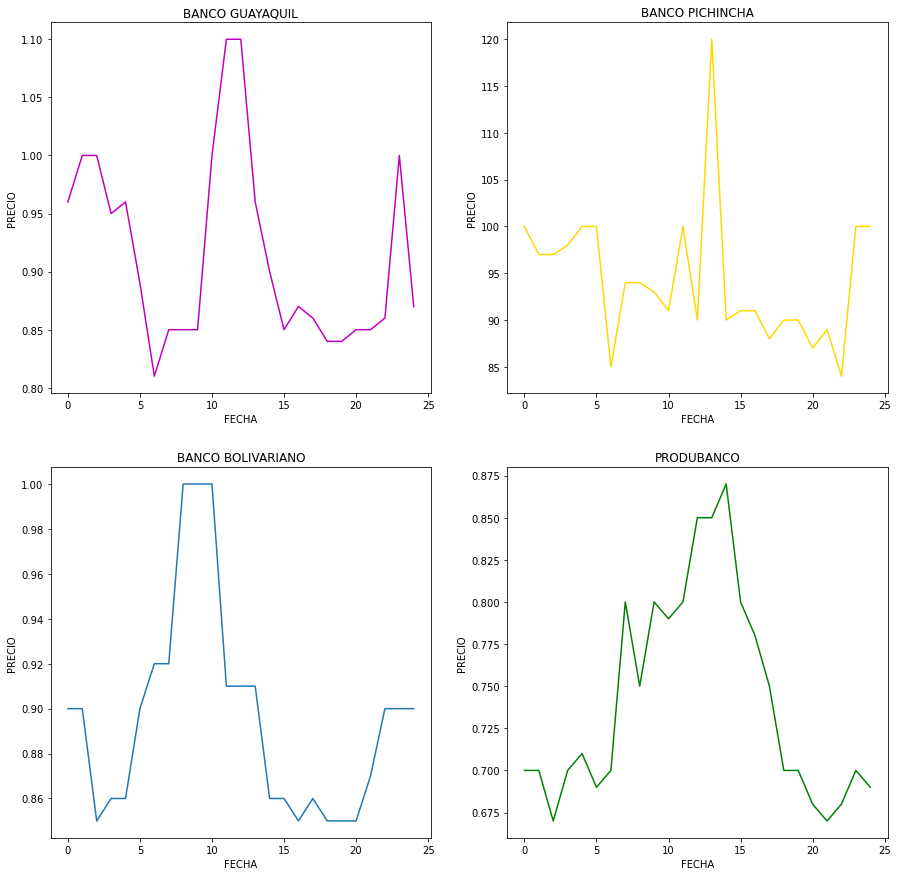

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].plot(sector_financiero.index, sector_financiero['BANCO GUAYAQUIL'], color='m')
axs[0, 0].set_title('BANCO GUAYAQUIL')
axs[0, 1].plot(sector_financiero.index, sector_financiero['BANCO PICHINCHA'], color='gold')
axs[0, 1].set_title('BANCO PICHINCHA')
axs[1, 0].plot(sector_financiero.index, sector_financiero['BANCO BOLIVARIANO'])
axs[1, 0].set_title('BANCO BOLIVARIANO')
axs[1, 1].plot(sector_financiero.index, sector_financiero['PRODUBANCO'], color='g')
axs[1, 1].set_title('PRODUBANCO')
for ax in axs.flat:
    ax.set(xlabel='FECHA', ylabel='PRECIO')

In [73]:
sector_financiero.to_excel("sector_financiero.xlsx")